## Trabalho Prático 01 - Aprendizagem de Máquina
- Thiago Martin Poppe
- 2017014324

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Lendo o dataset

- Lendo os dados e imprimindo as 5 primeiras linhas para ter uma visualização geral

In [2]:
df = pd.read_csv('koi_data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5202, 43)


,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


## Convertendo dados categóricos para numéricos
- Iremos converter CONFIRMED para 1 e FALSE POSITIVE para 0

In [3]:
df['koi_disposition'] = (df['koi_disposition'] == 'CONFIRMED').astype(int)
df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,1,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,0,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,1,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,0,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


## Separando entre classe e atributos

- Separando valores entre y (CONFIRMED ou FALSE POSITIVE) e X (features).
- Normalizando as features para que sua distribuição $\approx$ N(0, 1): $$x' = \frac{x - mean(x)}{std(x)}$$

In [4]:
y = df['koi_disposition']
X = df.drop(['kepoi_name', 'koi_disposition'], axis=1) # nome e classe não são atributos

X = (X - np.mean(X)) / np.std(X, ddof=1)
X.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,-0.311523,-0.217299,-0.380535,-0.309368,-0.082308,-0.008253,-0.029723,-0.301276,0.519877,-0.452083,...,0.071564,0.118416,0.000962,-0.012755,0.016119,0.104646,-0.549713,0.048032,0.149462,-0.509178
1,0.196636,-0.049884,-0.157990,-0.305502,-0.080138,-0.015586,-0.029569,0.476664,0.514358,-0.903237,...,-0.024986,0.138089,0.014050,-0.019205,0.178346,0.031827,-0.489349,0.214354,0.079985,-0.451904
2,-0.399187,0.212652,-0.459685,-0.197957,0.058845,-0.127115,-0.021291,-0.543633,-0.864035,0.323901,...,0.022287,0.054786,0.049967,-0.023978,-0.080812,0.085349,-0.521437,-0.088677,0.072306,-0.523178
3,-0.390267,-0.006128,-0.567677,-0.309555,-0.081642,-0.056862,-0.029591,-0.499380,0.259282,0.338080,...,0.031487,0.070253,0.005223,-0.006563,0.032341,-0.000942,-0.581484,0.043975,0.043418,-0.588726
4,-0.335570,0.171940,-0.084024,-0.315072,-0.020035,-0.135708,-0.019736,-0.314924,-1.242358,0.255584,...,-1.192705,1.688816,0.050119,-0.077256,-1.807321,2.839001,2.223870,-1.824919,2.856491,2.236176


## Separação de dado de treino e dado de teste

- Utilização da função train_test_split, disponível em ``sklearn.model_selection``, para realizar a separação entre dados de treino e dados de teste.
- Posteriormente, usaremos validação cruzada sobre os dados de treino durante a construção do modelo.

In [5]:
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

print("Sizeof X train:", X_train.shape[0])
print("Sizeof y train:", y_train.size)
print("-----------------")
print("Sizeof X test:", X_test.shape[0])
print("Sizeof y test:", y_test.size)

Sizeof X train: 3901
Sizeof y train: 3901
-----------------
Sizeof X test: 1301
Sizeof y test: 1301


## Validação Cruzada

- Usaremos a classe StratifiedKFold, disponível em ``sklearn.model_selection``, para realizar a validação cruzada com 5-folds.
- Instanciaremos a classe para uso posterior.

In [6]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # fixed seed
print("Número de splits:", skf.get_n_splits())

Número de splits: 5


## Função para exibição das métricas

- Apenas uma função que exibe as métricas que queremos. No caso: acurácia, precisão e revocação.

In [7]:
def show_metrics_validation(accuracy_list, val_recall, val_precision):
    val_accuracy  = np.array(accuracy_list).mean()
    val_recall    = np.array(recall_list).mean()
    val_precision = np.array(precision_list).mean()

    print("Métricas durante treino/validação:")
    print('  - Accuracy  =', val_accuracy)
    print("  - Recall    =", val_recall)
    print("  - Precision =", val_precision)

def show_metrics_test(y_pred):
    print("\nMétricas durante teste:")
    print('  - Accuracy  =', metrics.accuracy_score(y_test, y_pred))
    print("  - Recall    =", metrics.recall_score(y_test, y_pred))
    print("  - Precision =", metrics.precision_score(y_test, y_pred))

## 1) Naive Bayes

- Treinamento de um modelo Naive Bayes Gaussiano através da classe GaussianNB, disponível em ``sklearn.naive_bayes``.
- Esse modelo servirá de baseline para os próximos.

### 1.1) Treinamento do modelo

In [13]:
# Criando lista para cada métrica
accuracy_list = []
recall_list = []
precision_list = []

# Instanciando classificador
classifier = GaussianNB()

# Dividindo os dados de treino em treino e validação (5 folds)
for train, val in skf.split(X, y):
    # Treinando o modelo
    classifier.fit(X[train], y[train])
    y_pred = classifier.predict(X[val])

    # Guardando métricas
    accuracy_list.append(metrics.accuracy_score(y[val], y_pred))
    recall_list.append(metrics.recall_score(y[val], y_pred))
    precision_list.append(metrics.precision_score(y[val], y_pred))

# Exibindo as métricas na validação e teste
show_metrics_validation(accuracy_list, recall_list, precision_list)

Métricas durante treino/validação:
  - Accuracy  = 0.9173383580876375
  - Recall    = 0.9724409003506391
  - Precision = 0.8461968113371412


### 1.2) Explicação do modelo

- O modelo Naive Bayes faz parte de uma família de classificadores simples baseados em aplicações do teorema de Bayes. Nela supomos fortemente que as features são independentes entre si, explicando assim a parte "ingênua" do algoritmo.
- A escolha do conjunto de features se torna importante, pois podemos escolher um quantia boa de features independentes entre si, melhorando assim a acurácia do nosso modelo.

- Teorema de Bayes:
$$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} $$

## 2) Árvores de Decisão

- Treinamento de um modelo Decision Tree através da classe DecisionTreeClassifier, disponível em ``sklearn.tree``.
- Para este modelo iremos variar o hiperparâmetro correspondente à altura da árvore.

### 2.1) Treinamento do modelo

In [9]:
# Criando lista de alturas (1 à 31) incluindo altura ilimitada no final da lista (None)
heights = list(range(1, 21))
heights.append('Inf')

# Variáveis para guardar a melhor acurácia na validação e hiperparametros
best_model = dict()
best_acc = 0

# Criando lista de resultados para cada altura
acc_val = dict(); rec_val = dict(); prec_val = dict()
acc_tst = dict(); rec_tst = dict(); prec_tst = dict()

for height in heights:
    # Criando lista para cada métrica
    accuracy_list = []
    recall_list = []
    precision_list = []

    # Instanciando árvore de decisão de altura = height
    if height == 'Inf':
        classifier = DecisionTreeClassifier(max_depth=None)
    else:
        classifier = DecisionTreeClassifier(max_depth=height)

    # Dividindo os dados de treino em treino e validação (5 folds)
    for train, val in skf.split(X_train, y_train):
        # Treinando o modelo
        classifier.fit(X_train[train], y_train[train])
        y_pred = classifier.predict(X_train[val])

        # Guardando métricas
        accuracy_list.append(metrics.accuracy_score(y_train[val], y_pred))
        recall_list.append(metrics.recall_score(y_train[val], y_pred))
        precision_list.append(metrics.precision_score(y_train[val], y_pred))

    # Guardando os resultados de validação pra altura atual
    acc_val[height] = np.array(accuracy_list).mean()
    rec_val[height] = np.array(recall_list).mean()
    prec_val[height] = np.array(precision_list).mean()

    # Guardando os resultados de teste para altura atual
    y_pred = classifier.predict(X_test)
    acc_tst[height] = metrics.accuracy_score(y_test, y_pred)
    rec_tst[height] = metrics.recall_score(y_test, y_pred)
    prec_tst[height] = metrics.precision_score(y_test, y_pred)

    if acc_val[height] > best_acc:
        best_acc = acc_val[height]
        best_model = {'Height': height}

### 2.2) Resultado do experimento

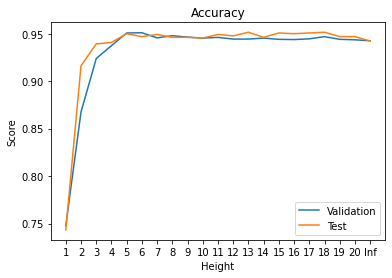

Best Accuracy in Validation:
  - Hyperparameters: {'Height': 6}
  - Accuracy: 0.9510354903312651


In [10]:
plt.title('Accuracy')
plt.xlabel('Height')
plt.ylabel('Score')
plt.plot(heights, acc_val.values(), label='Validation')
plt.plot(heights, acc_tst.values(), label='Test')
plt.legend()
plt.show()

print("Best Accuracy in Validation:")
print("  - Hyperparameters:", best_model)
print("  - Accuracy:", best_acc)

- Neste experimento variamos o hiperparâmetro associado com a altura máxima da árvore de decisão.
- Podemos ver no resultado acima que o modelo que mais se saiu bem durante o treino/validação foi a árvore de altura 5 com acurácia $\approx$ 95%.
- Quanto maior a altura da árvore de decisão mais complexa e específica ela se torna, podendo resultar em um caso de overfitting, onde o modelo "decora" os dados ao invés de aprender e generalizar os mesmos. Podemos ver que alturas maiores que 5 resultam em acurácias cada vez menores durante o teste, indicando um possível overfit.
- A altura ilimitada é representada por _Inf_ ao longo do eixo x.